<b> CLIMATE CHANGE ANALYSIS <b><br>
<br>
Gaurav Kataria

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import calendar
import dateutil
import time
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from fbprophet import Prophet
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.compose  import make_column_selector as selector 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide' 
    target_cell = this_cell  
    js_hide_current = ''  

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()


In [2]:
Image(url= "climate change impact.jpg")

<b> Human activity is changing the climate in unprecedented and sometimes irreversible ways.</b> <br>
<br>
Climate is the average weather in a region over many years. Climate change is the shift in those average conditions. The Earth is now in a period of rapid climate change, with global temperatures rising because of human activities, such as the burning of fossil fuels, GHG emissions and Deforestation <br>

It is unequivocal that human influence has warmed the atmosphere, ocean and land. Widespread and rapid changes in the atmosphere, ocean, cryosphere and biosphere have occurred.<br>

The scale of recent changes across the climate system as a whole and the present state
of many aspects of the climate system are unprecedented over many centuries to many
thousands of years.<br>

Human-induced climate change is already affecting many weather and climate extremes in
every region across the globe. Evidence of observed changes in extremes such as
heatwaves, heavy precipitation, droughts, and tropical cyclones, and, in particular, their
attribution to human influence.<br>
    
If climate change is not dealt with it might lead to extreme weather events, melting of polar ice caps, sea level rise and increased rise in natural disasters. And more recently mentioned, as global temperatures have increased by 1.5 degree celsius, this might make the permafrost susceptible to fall out leading to catostrophical rise in the level of methane further accelerating th process of climate change.<br>


In this notebook, i'll be exploring and analysing different datasets based on this topic and visualising climate change and it's causing factors.


In [3]:
gt_cou=pd.read_csv("GlobalLandTemperaturesByCountry.csv")
gt_cou.dropna(axis = 0, inplace = True)
gt_cou['Date'] = pd.to_datetime(gt_cou.dt)
gt_cou.set_index(gt_cou['Date'], inplace=True, drop=True)
del gt_cou['dt']

gt=pd.read_csv("GlobalTemperatures.csv")
gt.dropna(axis = 0, inplace = True)
gt['Date'] = pd.to_datetime(gt.dt)
gt.set_index(gt['Date'], inplace=True, drop=True)

Year_Temp = gt.groupby(gt['Date'].dt.year)['LandAverageTemperature','LandMaxTemperature',
                                                           'LandMinTemperature','LandAndOceanAverageTemperature'].mean().reset_index()
Year_Temp.rename(columns = {'Date':'Year'}, inplace = True)
fig = go.Figure()
for template in ["plotly_dark"]:
    fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandAverageTemperature,
                        mode='lines',
                        name='Land Avgerage Temp.',
                        marker_color='#43D73B'))
    fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandMaxTemperature,
                        mode='lines',
                        name='Land Maximum Temp.',
                        marker_color='#C30D19'))
    fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandMinTemperature,
                        mode='lines',
                        name='Land Minimum Temp.',
                        marker_color='#0079CE'))

    fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandAndOceanAverageTemperature,
                        mode='lines',
                        name='Land & Ocean Avgerage Temp.',
                        marker_color='#5F00F0'))
    fig.update_layout(
        height=600,
        xaxis_title="Years",
        yaxis_title='Temperatures in degree celsius',
        title_text='Global Land and Ocean Temperatures from 1850 to 2015')
    fig.update_layout(showlegend=True, template=template)
fig.show()

hide_toggle()


As seen from the above graph, the global temperatures started steadily increasing from 1920 and then started significantly increasing after 1980s. And notable increase in the 21st century. It was also found out that the global temperature change might have started after the industrial revolution in 1760s and during the world wars. With rapid urbanisation starting around 1975, further increased global average temperatures.<b>It is said that two-thirds of the warming has occurred since 1975, at a rate of roughly 0.15-0.20°C per decade </b> which can be seen through the above visualisation. One of the reasoning of the constant maximum global temperatures from 1950s to 1970s as seen above can be the natural variability and possibly by the cooling effects of some aerosols generated by the rapid economic growth after World War II. There is a global consensus that from 1960 to 1974 there might have been global warming and cooling, but after 1975, global warming resumed at an increased pace compared to before. 

In [4]:
x_year=Year_Temp.Year
y_min=Year_Temp.LandMinTemperature
slope_min, intercept_min = np.polyfit(x_year, y_min, 1)
abline_values_min = [slope_min * i + intercept_min for i in x_year]

y_max=Year_Temp.LandMaxTemperature
slope_max, intercept_max = np.polyfit(x_year, y_max, 1)
abline_values_max = [slope_max * j + intercept_max for j in x_year]

y_avg=Year_Temp.LandAverageTemperature
slope_avg, intercept_avg = np.polyfit(x_year, y_avg, 1)
abline_values_avg = [slope_avg * k + intercept_avg for k in x_year]

y_oavg=Year_Temp.LandAndOceanAverageTemperature
slope_oavg, intercept_oavg = np.polyfit(x_year, y_oavg, 1)
abline_values_oavg = [slope_oavg * l + intercept_oavg for l in x_year]



fig = go.Figure()

fig = make_subplots(rows=2, cols=2,subplot_titles=("Slope:0.011470",
                                                   "Slope:0.00853155",
                                                   "Slope:0.007573",
                                                   "Slope:0.00535007"),
                    insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Trend of Global Temperatures",
                    font=dict( family="Courier New, monospace", 
                    size=12,color="#7f7f7f"),title_font_size = 15, 
                    hovermode= 'closest')

fig.add_trace(go.Scatter(x=x_year, y=y_min,
                        mode='lines',
                        name='Land Minimum Temp.',
                        marker_color='#0079CE',line=dict(dash='dash')), row = 1, col = 1)
fig.add_trace(go.Scatter(x=x_year, y=abline_values_min,
                        mode='lines',
                        name='Land Minimum Temp. Trend',
                        marker_color='#0079CE'), row = 1, col = 1)

fig.add_trace(go.Scatter(x=x_year, y=y_avg,
                        mode='lines',
                        name='Land Average Temp.',
                        marker_color='#43D73B',line=dict(dash='dash')), row = 1, col = 2)
fig.add_trace(go.Scatter(x=x_year, y=abline_values_avg,
                        mode='lines',
                        name='Land Average Temp. Trend',
                        marker_color='#43D73B'), row = 1, col = 2)

fig.add_trace(go.Scatter(x=x_year, y=y_max,
                        mode='lines',
                        name='Land Maximum Temp.',
                        marker_color='#C30D19',line=dict(dash='dash')), row = 2, col = 1)
fig.add_trace(go.Scatter(x=x_year, y=abline_values_max,
                        mode='lines',
                        name='Land Maximum Temp. Trend',
                        marker_color='#C30D19'), row = 2, col = 1)

fig.add_trace(go.Scatter(x=x_year, y=y_max,
                        mode='lines',
                        name='Land Maximum Temp.',
                        marker_color='#C30D19',line=dict(dash='dash')), row = 2, col = 1)
fig.add_trace(go.Scatter(x=x_year, y=abline_values_max,
                        mode='lines',
                        name='Land Maximum Temp. Trend',
                        marker_color='#C30D19'), row = 2, col = 1)

fig.add_trace(go.Scatter(x=x_year, y=y_oavg,
                        mode='lines',
                        name='Land and Ocean Average Temp.',
                        marker_color='#5F00F0',line=dict(dash='dash')), row = 2, col = 2)
fig.add_trace(go.Scatter(x=x_year, y=abline_values_oavg,
                        mode='lines',
                        name='Land and Ocean Average Temp. Trend',
                        marker_color='#5F00F0'), row = 2, col = 2)



fig.update_yaxes(title_text="Temp. in celsius", row=1, col=1)
fig.update_yaxes(title_text="Temp. in celsius", row=1, col=2)
fig.update_yaxes(title_text="Temp. in celsius", row=2, col=1)
fig.update_yaxes(title_text="Temp. in celsius", row=2, col=2)


fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Years", row=1, col=2)
fig.update_xaxes(title_text="Years", row=2, col=1)
fig.update_xaxes(title_text="Years", row=2, col=2)



fig.update_layout(
        height=600,
        width=1200,
        title_text='Global Land and Ocean Temperatures from 1850 to 2015 with Trend',
        template='plotly_dark'    
)
fig.update_layout(showlegend=True)
fig.show()

hide_toggle()

The above graph shows an increasing trend in all categories. One can also see that the <b>minimum global temperatures are increasing at a faster rate than maximum temperatures, hence, showing signs of global warming.</b>

In [5]:
gtcou_19502013=gt_cou[['Date','AverageTemperature','Country']]

gtcou_19501999=gtcou_19502013[['Date','AverageTemperature','Country']]
mask1 = (gtcou_19502013['Date'] > '1950-01-01') & (gtcou_19502013['Date'] <= '1999-01-01')
gtcou_19501999.loc[mask1]

gtcou_19501999 = gtcou_19501999.loc[mask1]

gtcou_20002013=gtcou_19502013[['Date','AverageTemperature','Country']]
mask2 = (gtcou_19502013['Date'] > '2000-01-01') & (gtcou_19502013['Date'] <= '2013-09-01')
gtcou_20002013.loc[mask2]

gtcou_20002013 = gtcou_20002013.loc[mask2]

country_temp19 = gtcou_19501999.groupby(by = ['Country']).mean().reset_index()
fig19 = px.choropleth(country_temp19, locations="Country", locationmode = "country names", color="AverageTemperature",
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title="Average Temperatures Contrywise Worldwide From 1900 to 1999")
fig19.show()

hide_toggle()

In [6]:
country_temp20 = gtcou_20002013.groupby(by = ['Country']).mean().reset_index()
fig20 = px.choropleth(country_temp20, locations="Country", locationmode = "country names", color="AverageTemperature",
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title="Average Temperatures Contrywise Worldwide From 2000 to 2013")
fig20.show()

hide_toggle()

The first choropleth map shows the average temperature from 1900 to 1999 and the second is from 2000 to 2013, showing increase in the average global temperatures of the two centuries: <br>
<br>
<b>India->....1900-1999: 24.22......2000-2013: 24.75<br></b>
China->....1900-1999: 6.91.......2000-2013: 7.77<br>
<b>Russia->...1900-1999: -5.14......2000-2013: -3.81<br></b>
<b>US->.......1900-1999: 8.93.......2000-2013: 9.83<br></b>
UK->.......1900-1999: 8.75.......2000-2013: 9.48<br>
Brazil->...1900-1999: 25.06......2000-2013: 25.57<br>
Australia->1900-1999: 21.87......2000-2013: 22.20<br>
Japan->....1900-1999: 12.32......2000-2013: 12.90<br>
<b>Canada->....1900-1999: -4.74......2000-2013: -3.40<br></b>

In [7]:
gt["Year"] = pd.DatetimeIndex(gt['Date']).year
gt["Month"] = pd.DatetimeIndex(gt['Date']).month
gt['Month'] = gt['Month'].astype(str) 
gt.loc[gt['Month']=='1','Month'] = 'January'
gt.loc[gt['Month']=='2','Month'] = 'February'
gt.loc[gt['Month']=='3','Month'] = 'March'
gt.loc[gt['Month']=='4','Month'] = 'April'
gt.loc[gt['Month']=='5','Month'] = 'May'
gt.loc[gt['Month']=='6','Month'] = 'June'
gt.loc[gt['Month']=='7','Month'] = 'July'
gt.loc[gt['Month']=='8','Month'] = 'August'
gt.loc[gt['Month']=='9','Month'] = 'September'
gt.loc[gt['Month']=='10','Month'] = 'October'
gt.loc[gt['Month']=='11','Month'] = 'November'
gt.loc[gt['Month']=='12','Month'] = 'December'
year_month = gt.groupby(by = ['Year','Month']).mean().reset_index()

month_season = {
    "January": "Winter",
    "February": "Winter",
    "March": "Spring",
    "April": "Spring",
    "May": "Summer",
    "June": "Summer",
    "July": "Summer",
    "August": "Summer",
    "September": "Autumn",
    "October": "Autumn",
    "November": "Winter",
    "December": "Winter"}

gt['Season'] = ''

for month, season in month_season.items():
    gt.loc[gt['Month'] == month, 'Season'] = season

year_season = gt.groupby(by = ['Year','Season']).mean().reset_index()

Winter = year_season.loc[year_season['Season'] == 'Winter',:]
Spring = year_season.loc[year_season['Season'] == 'Spring',:]
Summer = year_season.loc[year_season['Season'] == 'Summer',:]
Autumn = year_season.loc[year_season['Season'] == 'Autumn',:]

fig33 = go.Figure()
for template in ["plotly_dark"]:
    fig33.add_trace(go.Scatter(x=Winter['Year'], y=Winter['LandAverageTemperature'],
                    mode='lines',
                    #stackgroup='one',
                    name='Winter',
                    marker_color='#54CDFF'))
    fig33.add_trace(go.Scatter(x=Spring['Year'], y=Spring['LandAverageTemperature'],
                    mode='lines',
                    #stackgroup='one',
                    name='Spring',
                    marker_color='#43D73B'))
    fig33.add_trace(go.Scatter(x=Autumn['Year'], y=Autumn['LandAverageTemperature'],
                    mode='lines',
                    #stackgroup='one',
                    name='Autumn',
                    marker_color='#CD3509'))
    fig33.add_trace(go.Scatter(x=Summer['Year'], y=Summer['LandAverageTemperature'],
                    mode='lines',
                    #stackgroup='one',
                    name='Summer',
                    marker_color='#EFB932'))

    fig33.update_layout(
    height=600,
    xaxis_title="Years",
    yaxis_title='Temperature in degree celsius',
    title_text='Rise in Global Seasonal Average Temperatures',
    template=template)

fig33.show()

hide_toggle()

In [8]:
x_winter=Winter['Year']

y_winter=Winter['LandAverageTemperature']
slope_winter, intercept_winter = np.polyfit(x_winter, y_winter, 1)
abline_values_winter = [slope_winter * i + intercept_winter for i in x_winter]


x_summer=Summer['Year']
y_summer=Summer['LandAverageTemperature']
slope_summer, intercept_summer = np.polyfit(x_summer, y_summer, 1)
abline_values_summer = [slope_summer * j + intercept_summer for j in x_summer]


fig33 = go.Figure()

fig33 = make_subplots(rows=2, cols=1,shared_xaxes=True,vertical_spacing=0.05,subplot_titles=("Slope:0.006184",
                                                   "Slope:0.010307"),
                    insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])

fig33.update_layout(title="Seasonwise Trend",
                    font=dict( family="Courier New, monospace", 
                    size=12,color="#7f7f7f"),title_font_size = 15, 
                    hovermode= 'closest')

fig33.add_trace(go.Scatter(x=x_summer, y=y_summer,
                        mode='lines',
                        name='Summer Temp',
                        marker_color='red',line=dict(dash='dash')), row = 1, col = 1)
fig33.add_trace(go.Scatter(x=x_summer, y=abline_values_summer,
                        mode='lines',
                        name='Summer Trend',
                        marker_color='red'), row = 1, col = 1)

fig33.add_trace(go.Scatter(x=x_winter, y=y_winter,
                        mode='lines',
                        name='Winter Temp',
                        marker_color='blue',line=dict(dash='dash')), row = 2, col = 1)
fig33.add_trace(go.Scatter(x=x_winter, y=abline_values_winter,
                        mode='lines',
                        name='Winter Trend',
                        marker_color='blue'), row = 2, col = 1)

fig33.update_yaxes(title_text="Temp. in celsius", row=1, col=1)

fig33.update_yaxes(title_text="Temp. in celsius", row=2, col=1)

fig33.update_xaxes(title_text="Years", row=2, col=1)


fig33.update_layout(
        height=600,
        width=1000,
        title_text='Increasing Global Trend of Temperatures in Summer & Winter (Winter Temp. rising faster)',
        template='plotly_dark'    
)

fig33.show()

hide_toggle()

As seen from the above graph, <b>rate of temperature rise in winter is more than that of summer</b>. Not only this, the winter weather duration has also reduced in certain regions. Increasing temperatures and short duration of winter season can cause record breaking floods and sudden downpours. <b>Between 1970 and 2017, winter in the mainland U.S. warmed more than four-and-a-half times faster per decade than over the past 100 years.</b> 2016 is said to be the warmest year since they began keeping weather records in 1880s. This type of change can also lead to sudden dips in winter temperatures leading to extreme cold temperatures as seen in recent years.

<b>So when did Global Warming started at it's full pace</b>

In [9]:
cddf=gt.copy()

cddf.drop(columns = ['dt'], axis = 1, inplace = True)


cddf['day'] = cddf['Date'].dt.day
cddf['week'] = cddf['Date'].dt.week
cddf['month'] = cddf['Date'].dt.month
cddf['year'] = cddf['Date'].dt.year

cddf['week'].value_counts() 

earth_data = cddf.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') 


fig55 = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig55.update_layout(title="When did Global Warming start showing it's signs?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),title_font_size = 25, hovermode= 'closest')
fig55.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig55.update_yaxes(showline=True, linewidth=1, linecolor='gray')


fig55.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',name = 'Land Avg Temp', marker_color='#CD3509'), row = 1, col = 1)
fig55.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="white"), showlegend=False),row = 1, col = 1)

fig55.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',name = 'Land Min Temp', marker_color='#0079CE'), row = 1, col = 2)
fig55.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="white"), showlegend=False),row = 1, col = 2)

fig55.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',name = 'Land Max Temp', marker_color='#C30D19'), row = 2, col = 1)
fig55.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="white"), showlegend=False),row = 2, col = 1)

fig55.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',name = 'Land&Ocean Avg Temp', marker_color='#0002E6'), row = 2, col = 2)
fig55.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="white"), showlegend=False),row = 2, col = 2)



fig55.update_yaxes(title_text="Temp. in celsius", row=1, col=1)
fig55.update_yaxes(title_text="Temp. in celsius", row=1, col=2)
fig55.update_yaxes(title_text="Temp. in celsius", row=2, col=1)
fig55.update_yaxes(title_text="Temp. in celsius", row=2, col=2)

fig55.update_xaxes(title_text="Years", row=1, col=1)
fig55.update_xaxes(title_text="Years", row=1, col=2)
fig55.update_xaxes(title_text="Years", row=2, col=1)
fig55.update_xaxes(title_text="Years", row=2, col=2)

fig55.update_layout(
    height=600,
    width=1100,
    title_text='Global Warming Turning Point (1975)',
    template='plotly_dark')

fig55.show()

hide_toggle()

You can see, how after 1975 the rate of increase has gone up alot in comparison to the rate of increase of temperature before 1975. Reasons are as follows:
1. Industrialisation
2. Rapid Urbanisation

In [10]:
fig66 = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig66.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),template = "ggplot2", title_font_size = 20, hovermode= 'closest')

fig66.add_trace(go.Violin(x = earth_data['turnpoint'], y = earth_data['LandAverageTemperature'],points = 'all',jitter = 0.3, pointpos = -1.6, marker_color = 'rgb(128, 0, 0)',name = 'Land Avg Temp',scalegroup='Avg'),row = 1, col = 1)
fig66.add_trace(go.Violin(x =  earth_data['turnpoint'], y =earth_data['LandMinTemperature'],points = 'all',jitter = 0.3, pointpos = -1.6, marker_color = 'rgb(210,105,30)', name = 'Land Min Temp',scalegroup='Min'),row = 1, col = 2)
fig66.add_trace(go.Violin(x = earth_data['turnpoint'] , y =earth_data['LandMaxTemperature'],points = 'all',jitter = 0.3, pointpos = -1.6, marker_color = 'rgb(135,206,235)', name = 'Land Max Temp',scalegroup='Max'),row = 2, col = 1)
fig66.add_trace(go.Violin(x =  earth_data['turnpoint'], y =earth_data['LandAndOceanAverageTemperature'], points = 'all',jitter = 0.3, pointpos = -1.6, marker_color = 'rgb(107,142,35)', name = 'Land&Ocean Avg Temp',scalegroup='L&O Avg'),row = 2, col = 2)

fig66.update_traces(orientation='v',box_visible=True, meanline_visible=True)

fig66.update_layout(
    height=600,
    template='plotly_dark'
)

fig66.show()

hide_toggle()

As mentioned above,two-thirds of the warming has occurred since 1975, at a rate of roughly 0.15-0.20°C per decade. From the above violin plot, one can distinctly see the shift of global surface and ocean temperatures from before 1975 to after 1975. The mean and median values of temperatures have shifted significantly. Such a shift is alarming as slight increase in global climate can lead to dangerous consequences.

In [11]:
gt_19001975=gt[['Date','LandAverageTemperature','LandMaxTemperature','LandMinTemperature']]
mask33 = (gt_19001975['Date'] > '1900-01-01') & (gt_19001975['Date'] <= '1975-01-01')
gt_19001975.loc[mask33]
gt_19001975 = gt_19001975.loc[mask33]

gt_19752015=gt[['Date','LandAverageTemperature','LandMaxTemperature','LandMinTemperature']]
mask44 = (gt_19752015['Date'] > '1975-01-01') & (gt_19752015['Date'] <= '2015-01-01')
gt_19752015.loc[mask44]
gt_19752015 = gt_19752015.loc[mask44]

mx_1900=gt_19001975['LandMaxTemperature'].mean()
mn_1900=gt_19001975['LandMinTemperature'].mean()
av_1900=gt_19001975['LandAverageTemperature'].mean()

mx_1975=gt_19752015['LandMaxTemperature'].mean()
mn_1975=gt_19752015['LandMinTemperature'].mean()
av_1975=gt_19752015['LandAverageTemperature'].mean()

print('Average Global Temperature (in Celsius) from 1900 to 1975:',av_1900)
print('Average Global Temperature (in Celsius) from 1975 to 2015:',av_1975)
print('Average Global Maximum Temperature (in Celsius) from 1900 to 1975:',mx_1900)
print('Average Global Maximum Temperature (in Celsius) from 1975 to 2015:',mx_1975)
print('Average Global Minimum Temperature (in Celsius) from 1900 to 1975:',mn_1900)
print('Average Global Minimum Temperature (in Celsius) from 1975 to 2015:',mn_1975)
hide_toggle()

Average Global Temperature (in Celsius) from 1900 to 1975: 8.531587777777782
Average Global Temperature (in Celsius) from 1975 to 2015: 9.17365625
Average Global Maximum Temperature (in Celsius) from 1900 to 1975: 14.316625555555568
Average Global Maximum Temperature (in Celsius) from 1975 to 2015: 14.870960416666664
Average Global Minimum Temperature (in Celsius) from 1900 to 1975: 2.6857877777777786
Average Global Minimum Temperature (in Celsius) from 1975 to 2015: 3.565945833333335


<b>New estimates show the chances of crossing the global warming level of 1.5°C in the next decades</b>, and unless there are immediate, rapid and large-scale reductions in greenhouse gas emissions, limiting warming to close to 1.5°C or even 2°C will be beyond reach.<br>

<b>The report shows that emissions of greenhouse gases from human activities are responsible for approximately 1.1°C of warming since 1850-1900</b>, and finds that averaged over the next 20 years, global temperature is expected to reach or exceed 1.5°C of warming. <br>

Climate change is affecting rainfall patterns. In high latitudes, precipitation is likely to increase, while it is projected to decrease over large parts of the subtropics. Changes to monsoon precipitation are expected, which will vary by region.<br>

Coastal areas will see continued sea level rise throughout the 21st century, contributing to more frequent and severe coastal flooding in low-lying areas and coastal erosion.<b> Extreme sea level events that previously occurred once in 100 years could happen every year by the end of this century</b>.<br>


<b>Now Analysing Climate Change of India</b>

In [12]:
gt_ind = gt_cou[gt_cou.Country == "India"]
mask55 = (gt_ind['Date'] > '1875-01-01') & (gt_ind['Date'] <= '2013-08-01')
gt_ind.loc[mask55]
gt_ind = gt_ind.loc[mask55]
gt_ind["Year"] = pd.DatetimeIndex(gt_ind['Date']).year
gt_ind["month"] = pd.DatetimeIndex(gt_ind['Date']).month
hide_toggle()

In [13]:
gt_cou["Year"] = pd.DatetimeIndex(gt_cou['Date']).year

year_avg = pd.pivot_table(gt_cou, values='AverageTemperature', index='Year', aggfunc='mean')

year_avg['10 Years MA'] = year_avg['AverageTemperature'].rolling(10).mean()
fig=go.Figure()
fig.add_trace(go.Scatter(x= year_avg.index[150:] ,y=year_avg['AverageTemperature'][150:],
                        mode='lines',name='Average Temperature'))
fig.add_trace(go.Scatter(x= year_avg.index[150:],y=year_avg['10 Years MA'][150:],
                        mode='lines',name='10 years Rollling Mean'))

fig.update_layout(title='Average Temperature and Trend of Temperature in India', xaxis_title='Year',
                 yaxis_title='Temperature',template='plotly_dark', width = 900 , height = 600)
fig.show()
hide_toggle()

In [14]:
mean_temp = gt_ind['AverageTemperature'].mean()
fig=go.Figure()
years = [1900,1975,2012]
for year in years:
    fig.add_trace(go.Scatter(x=gt_ind.loc[gt_ind['Year']==year, 'month'],y=gt_ind.loc[gt_ind['Year']==year,'AverageTemperature'],
                            mode='lines',name=year))
    fig.add_hline(y=mean_temp)    
    fig.update_layout(xaxis_title="Months",
        yaxis_title='Temperature in degree celsius',template="plotly_dark", title_text="India's Average Temperatures for 1900, 1975 & 2012")
       
fig.show()
hide_toggle()

Average temperature of India has steadily increased from 1900 to 2013. India's temperature change over the years can be seen, but it is less alarming than the temperature change seen in colder countries like Russia and Canada as mentioned above. India's mean temperature over the years has been 24 degree celsius. According to a survey, <b>India's average temperature has risen by around 0.7 degrees Celsius during 1901-2018</b>. This change suggest droughts to occur more frequently in Northern and North-Western India. It also suggests the frequency of heat waves in India increasing in the future.

In [15]:
gt_ind["Year"] = pd.DatetimeIndex(gt_ind['Date']).year
gt_ind["Month"] = pd.DatetimeIndex(gt_ind['Date']).month
gt_ind['Month'] = gt_ind['Month'].astype(str) 
gt_ind.loc[gt_ind['Month']=='1','Month'] = 'January'
gt_ind.loc[gt_ind['Month']=='2','Month'] = 'February'
gt_ind.loc[gt_ind['Month']=='3','Month'] = 'March'
gt_ind.loc[gt_ind['Month']=='4','Month'] = 'April'
gt_ind.loc[gt_ind['Month']=='5','Month'] = 'May'
gt_ind.loc[gt_ind['Month']=='6','Month'] = 'June'
gt_ind.loc[gt_ind['Month']=='7','Month'] = 'July'
gt_ind.loc[gt_ind['Month']=='8','Month'] = 'August'
gt_ind.loc[gt_ind['Month']=='9','Month'] = 'September'
gt_ind.loc[gt_ind['Month']=='10','Month'] = 'October'
gt_ind.loc[gt_ind['Month']=='11','Month'] = 'November'
gt_ind.loc[gt_ind['Month']=='12','Month'] = 'December'
year_month = gt_ind.groupby(by = ['Year','Month']).mean().reset_index()

month_season = {
    "January": "Winter",
    "February": "Winter",
    "March": "Spring",
    "April": "Spring",
    "May": "Summer",
    "June": "Summer",
    "July": "Summer",
    "August": "Summer",
    "September": "Autumn",
    "October": "Autumn",
    "November": "Winter",
    "December": "Winter"
}

gt_ind['Season'] = ''

for month, season in month_season.items():
    gt_ind.loc[gt_ind['Month'] == month, 'Season'] = season

year_season = gt_ind.groupby(by = ['Year','Season']).mean().reset_index()

Winter = year_season.loc[year_season['Season'] == 'Winter',:]
Spring = year_season.loc[year_season['Season'] == 'Spring',:]
Summer = year_season.loc[year_season['Season'] == 'Summer',:]
Autumn = year_season.loc[year_season['Season'] == 'Autumn',:]

fig88 = go.Figure()
for template in ["plotly_dark"]:
    fig88.add_trace(go.Scatter(x=Winter['Year'], y=Winter['AverageTemperature'],
                    mode='lines',
                    name='Winter',
                    marker_color='#54CDFF'))
    fig88.add_trace(go.Scatter(x=Spring['Year'], y=Spring['AverageTemperature'],
                    mode='lines',
                    name='Spring',
                    marker_color='#43D73B'))
    fig88.add_trace(go.Scatter(x=Summer['Year'], y=Summer['AverageTemperature'],
                    mode='lines',
                    name='Summer',
                    marker_color='#EFB932'))
    fig88.add_trace(go.Scatter(x=Autumn['Year'], y=Autumn['AverageTemperature'],
                    mode='lines',
                    name='Autumn',
                    marker_color='#CD3509'))
    fig88.update_layout(
    height=600,
    xaxis_title="Years",
    yaxis_title='Temperature in degree celsius',
    title_text='Average Temperature of India seasonwise over the years',
    template=template)

fig88.show()

hide_toggle()

From the above graph, we can also see that the winter season temperatures have increased consistently from 1960s and have increased at a faster pace than summer temperature. The same trend as global temperatures can be seen in India as well.

Global surface temperature will continue to increase until at least the mid-century under all
emissions scenarios considered. <b>Global warming of 1.5°C and 2°C will be exceeded
during the 21st century unless deep reductions in carbon dioxide (CO2) and other
greenhouse gas emissions occur in the coming decades</b>.<br>

Under scenarios with increasing CO2 emissions, the ocean and land carbon sinks are
projected to be less effective at slowing the accumulation of CO2 in the atmosphere.<b>Many changes due to past and future greenhouse gas emissions are irreversible for
centuries to millennia, especially changes in the ocean, ice sheets and global sea level</b>.<br>

<b>Some of the changes already set in motion—such as continued sea level rise—are irreversible over hundreds to thousands of years</b>. However, strong and sustained reductions in emissions of carbon dioxide (CO2) and other greenhouse gases would limit climate change. While benefits for air quality would come quickly, it could take 20-30 years to see global temperatures stabilize, according to the IPCC Working Group I report, Climate Change 2021: the Physical Science Basis.<br>


Now in case of India, there is comparatively less overall increase in temperature season wise over the years, but yes there is a change which is indicative of warming of temperatures. The trend globally speaking and in India is also for collective warming of temperatures over the years.<br>
Climate change is due to various factors such as: <br>

1. GHG Emissions
2. Pollution
3. Increasing Energy Consumption
4. Not utilising renewable energy
5. Deforestation<br>

The performance index for climate change is CCPI(Climate Change Performance Index), which evaluates many countries based on:

1. GHG Emissions
2. Energy Use
3. Renewable Energy
4. Climate Policy<br>

Here, the CCPI's climate policy section evaluates countries’ progress in implementing policies working towards achieving the Paris Agreement goals.<b><br> India is ranked at 10th place according to CCPI evaluations and has a score of 63.98</b>.<br>
CCPI evaluates 57 countries and the European Union, which together generate 90%+ of global greenhouse gas emissions.
Using standardised criteria, the CCPI looks at four categories, with 14 indicators: Greenhouse Gas Emissions (40% of the overall score), Renewable Energy (20%), Energy Use (20%), and Climate Policy (20%).
The climate policy section evaluates countries’ progress in implementing policies working towards achieving the Paris Agreement goals.<br>
In the following sections, i'll be visualising the CCPI categories for India.


<b> GHG Emissions & Air Pollution in India </b>

In [16]:
ind_co2=pd.read_csv('India_trend_co2.csv')
ind_co2.set_index(ind_co2['Year'], inplace=True, drop=True)
df=pd.read_csv('cumulative-co-emissions.csv')
df_ind=df[df.Entity=='India']
dfas=pd.read_csv('annual-share-of-co2-emissions.csv')
dfas_ind=dfas[dfas.Entity=='India']

figcpc = go.Figure()
figcpc = make_subplots(rows=2, cols=2,vertical_spacing=0.1,
                       insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])

figcpc.update_layout(title="CO2 emmisions",font=dict( family="Courier New, monospace", 
                                                     size=12,color="#7f7f7f"),title_font_size = 25, 
                                                     hovermode= 'closest')

figcpc.add_trace(go.Scatter(x=ind_co2.index, y=ind_co2['Fossil CO2  Emissions (tons)'],
                    mode='lines+markers',
                    stackgroup='one',
                    name='Annual emissions of CO2 from fossil fuels',
                    marker_color='#FF004C'), row = 1, col = 1) 

figcpc.add_trace(go.Scatter(x=ind_co2.index, y=ind_co2['CO2 emissions per capita'],
                    mode='lines+markers',
                    stackgroup='one',
                    name='CO2 emissions per capita',
                    marker_color='#EA4D37'), row = 2, col = 1)

figcpc.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['Cumulative CO2 emissions'],
                        mode='lines',stackgroup='one',name='Cummulative CO2 emissions'), row = 1, col = 2)

figcpc.add_trace(go.Scatter(x=dfas_ind.Year,y=dfas_ind['Share of global CO2 emissions'],
                        mode='lines',stackgroup='one',name="India's share of global CO2 emissions"), row = 2, col = 2)

figcpc.update_yaxes(title_text="CO2 Emissions in billion tons", row=1, col=1)
figcpc.update_yaxes(title_text="Fossil Fuel's CO2 Emissions in billion tons", row=2, col=1)
figcpc.update_xaxes(title_text="Years", row=2, col=1)
figcpc.update_xaxes(title_text="Years", row=1, col=2)
figcpc.update_xaxes(title_text="Years", row=2, col=2)
figcpc.update_yaxes(title_text="Cumulative CO2 emissions in billion tons", row=1, col=2)
figcpc.update_yaxes(title_text="India's share of global CO2 emissions", row=2, col=2)

figcpc.update_layout(
    height=800,
    width=1200,
    title_text='CO2 Emissions of India',
    template='plotly_dark')

figcpc.show()
hide_toggle()

In [17]:
df=pd.read_csv('CO2-by-source.csv')
df_ind=df[df.Entity=='India']
dff=pd.read_csv('ghg-emissions-by-sector.csv')
dff_ind=dff[dff.Entity=='India']
fig=go.Figure()

fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['CO2 emissions from coal'],
                        mode='lines',name='coal'))
fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['CO2 emissions from gas'],
                        mode='lines',name='gas'))
fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['CO2 emissions from cement'],
                        mode='lines',name='cement'))
fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['CO2 emissions from flaring'],
                        mode='lines',name='flaring'))
fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['CO2 emissions from oil'],
                        mode='lines',name='oil'))
fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['CO2 emissions from other industry'],
                        mode='lines',name='other industries'))
fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="India's CO2 emissions in billion tons")
fig.update_layout(
    height=600,
    width=1000,
    title_text='CO2 emissions by source',
    template='plotly_dark')
fig.show()
fige=go.Figure()
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind["Agriculture (GHG Emissions, CAIT)"],
                        mode='lines',name='Agriculture '))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Land-Use Change and Forestry (GHG Emissions, CAIT)'],
                        mode='lines',name='Land-Use Change and Forestry'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Waste (GHG Emissions, CAIT)'],
                        mode='lines',name='Waste'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Industry (GHG Emissions, CAIT)'],
                        mode='lines',name='Industry'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Manufacturing/Construction energy (GHG Emissions, CAIT)'],
                        mode='lines',name='Manufacturing/Construction energy'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Transport (GHG Emissions, CAIT)'],
                        mode='lines',name='Transport'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Electricity & Heat (GHG Emissions, CAIT)'],
                        mode='lines',name='Electricity & Heat '))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Buildings (GHG Emissions, CAIT)'],
                        mode='lines',name='Buildings'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Fugitive from energy production (GHG Emissions, CAIT)'],
                        mode='lines',name='Fugitive from energy production'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Other Fuel Combustion (GHG Emissions, CAIT)'],
                        mode='lines',name='Other Fuel Combustion'))
fige.add_trace(go.Scatter(x=dff_ind.Year,y=dff_ind['Bunker Fuels (GHG Emissions, CAIT)'],
                        mode='lines',name='Bunker Fuels'))
fige.update_xaxes(title_text="Years")
fige.update_yaxes(title_text="GHG emissions in billion tons")

fige.update_layout(
    height=600,
    width=1000,
    title_text="India's GHG Emissions per sector",
    template='plotly_dark')
fige.show()
hide_toggle()

CO2 emissions have consistently increased and according to world bank data from 2019,<b> India's current annual CO2 emissions from fossil fuels are at 2.62 billion tons</b>. <b>India accounts for 7.18% of global CO2 emissions </b>according to recent 2019 data.<br>
India's per capita emissions are at 1.91 tons, which is essential information as there is a population difference when comparing it with other countries, hence it is essential to know the carbon footprint of the average person in the country.<b> Considering annual emissions and per capita emissions, China and US are the top two having per capita emissions of 7.38 tons and 15.52 tons respectively.</b>India's cummulative emissions has risen to 51 billion tons in 2019. <b>After covid it is reported that India's annual emissions declined 9.7%</b>.<br>

<b>Annual cuts of 1-2 billion tonnes of CO2 are needed throughout the 2020s and beyond to avoid exceeding global warming within the range 1.5°C to well below 2°C</b>, which is the ambition of the UN Paris Agreement. In case of CO2 emissions from fossil fuels, coal is the largest contributor followed by oil.

If both the CO2 and particulate inputs to the atmosphere grow at equal rates in the future, the widely differing atmospheric residence times of the two pollutants means that the particulate effect will grow in importance relative to that of CO2.

India's GHG emissions produced by sectors is lead by electricity and heat followed by the agriculture sector. Land use change and forestry can also be seen to have produced emissions in recent years.


In [18]:
df_station_hour = pd.read_csv("station_hour.csv")
df_city_hour    = pd.read_csv("city_hour.csv")
df_station_day  = pd.read_csv("station_day.csv")
df_city_day     = pd.read_csv("city_day.csv")
df_stations     = pd.read_csv("stations.csv")
df_city_day=df_city_day[['Date','City','CO']]
mask20 = (df_city_day['Date'] > '2016-01-01') & (df_city_day['Date'] <= '2020-07-01')
df_city_day.loc[mask20]
df_city_day = df_city_day.loc[mask20]

df_chart = df_city_day.pivot(index='Date', columns='City', values='CO')
df_chart = df_chart.fillna(df_chart.mean())

hide_toggle()

In [19]:
df_aqd = pd.read_csv("air quality data.csv", encoding = "ISO-8859-1")

df_aqd['date'] = pd.to_datetime(df_aqd['date'],format='%Y-%m-%d') 
df_aqd['year'] = df_aqd['date'].dt.year # year
df_aqd['year'] = df_aqd['year'].fillna(df_aqd["year"].min())
df_aqd['year'] = df_aqd['year'].values.astype(int)

dd_aqd = df_aqd[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)

dg_aqd = df_aqd[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)

dr_aqd = df_aqd[['rspm','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)

ds_aqd = df_aqd[['spm','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)

fig_air = go.Figure()
fig_air = make_subplots(rows=2,cols=2,shared_xaxes=True,vertical_spacing=0.05,
                        insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])

fig_air.update_layout(title="Air Quality",font=dict( family="Courier New, monospace", 
                                                     size=12,color="#7f7f7f"),title_font_size = 25, 
                                                     hovermode= 'closest')

fig_air.add_trace(go.Scatter(x=dd_aqd.year, y=dd_aqd.so2,
                        mode='lines+markers',
                        name='SO2 levels',
                        marker_color='red'), row = 2, col = 1)
fig_air.add_trace(go.Scatter(x=dg_aqd.year, y=dg_aqd.no2,
                        name='NO2 levels',
                         mode='lines+markers',
                        marker_color='blue'), row = 1, col = 1)

fig_air.add_trace(go.Scatter(x=dr_aqd.year,y=dr_aqd.rspm,
                        name='RSPM',
                         mode='lines+markers',
                        marker_color='green'), row = 2, col = 2)
fig_air.add_trace(go.Scatter(x=ds_aqd.year,y=ds_aqd.spm,
                        name='SPM',
                         mode='lines+markers',
                        marker_color='white'), row = 1, col = 2)




fig_air.update_yaxes(title_text="SO2 Levels", row=2, col=1)
fig_air.update_yaxes(title_text="NO2 Levels", row=1, col=1)
fig_air.update_yaxes(title_text="RSPM Levels", row=2, col=2)
fig_air.update_yaxes(title_text="SPM Levels", row=1, col=2)
fig_air.update_xaxes(title_text="Years", row=2, col=1)
fig_air.update_xaxes(title_text="Years", row=2, col=2)



fig_air.update_layout(
    height=500,
    width=1000,
    title_text='Air Quality',
    template='plotly_dark')

fig_air.show()
hide_toggle()

In [20]:
import datetime

city_day = pd.read_csv('city_day.csv').sort_values(by = ['Date', 'City'])

city_day.Date = city_day.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
city_day = city_day.sort_values(by = 'Date')

city_day['B_X_O3_NH3'] = city_day['Benzene'] +\
city_day['Xylene'] + city_day['O3'] + city_day['NH3']

city_day['ParticulateMatters'] = city_day['PM2.5'] + city_day['PM10']

corr_with_AQI = city_day.corr().AQI.sort_values(ascending = False)

most_polluted = city_day[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)

cities = most_polluted.index
params = most_polluted.columns

def first_date(city, parameter):
    df = city_day[(city_day.City == city)]
    df = df[df[parameter].notnull()]
    if len(df) != 0:
        return df.iloc[0].Date.strftime('%Y-%m-%d')
    else: return('no_measurement')
        
        
for city in cities:
    for param in params:
        most_polluted.loc[city, str(param) + '_date'] = first_date(city, param)
        
hide_toggle()

In [21]:
dcgo = city_day.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()
figcgo = px.treemap(pd.melt(dcgo, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(dcgo, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
figcgo.show()

hide_toggle()

According to data, se can see SO2,SPM,NO2 and RSPM levels declining. SPM stands for Suspended Particulate Matter. Suspended Particulate Matter (SPM) are microscopic particles of solid or liquid matter suspended in the air. Some pollutants do not dissolve in water as their molecules are too big to mix between the water molecules. This material is called particulate matter. Respirable suspended particulate matter or RSPM is a causative agent of mortality and morbidity. Fine particles and other air pollutants are linked with a number of health problems like premature death & asthma. On average India's air quality according to data has improved due to covid but <b>in certain cities like New Delhi, air quality is extremely dangerous which might reduce life expectancy by 9 years</b>.

In [22]:
city_day['Year_Month'] = city_day.Date.apply(lambda x : x.strftime('%Y-%m'))

df = city_day.groupby(['Year_Month']).sum().reset_index()
metrices = corr_with_AQI[corr_with_AQI>0.5].index

fig_pmaqi = go.Figure()


fig_pmaqi = go.Figure()
fig_pmaqi = make_subplots(rows=2,cols=1,shared_xaxes=True,vertical_spacing=0.05,
                        insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])

fig_pmaqi.update_layout(title="Air Quality",font=dict( family="Courier New, monospace", 
                                                     size=12,color="#7f7f7f"),title_font_size = 20, 
                                                     hovermode= 'closest')

fig_pmaqi.add_trace(go.Scatter(x=df.Year_Month, y=df['PM10'],
                        mode='lines+markers',
                        name='PM10',
                        marker_color='red'), row = 1, col = 1)

fig_pmaqi.add_trace(go.Scatter(x=df.Year_Month, y=df.AQI,
                        mode='lines+markers',
                        name='AQI',
                        marker_color='blue'), row = 1, col = 1)

fig_pmaqi.add_trace(go.Scatter(x=df.Year_Month, y=df['PM2.5'],
                        mode='lines+markers',
                        name='PM 2.5',
                        marker_color='green'), row = 1, col = 1)
fig_pmaqi.add_trace(go.Scatter(x=df.Year_Month, y=df.NOx,
                        mode='lines+markers',
                        name='NOX',
                        marker_color='white'), row = 2, col = 1)
fig_pmaqi.add_trace(go.Scatter(x=df.Year_Month, y=df.CO,
                        mode='lines+markers',
                        name='CO',
                        marker_color='orange'), row = 2, col = 1)



fig_pmaqi.update_yaxes(title_text="Emissions", row=1, col=1)
fig_pmaqi.update_yaxes(title_text="Emissions", row=2, col=1)

fig_pmaqi.update_xaxes(title_text="Years", row=2, col=1)


fig_pmaqi.update_layout(
    height=500,
    width=1000,
    title_text='PM 10, PM 2.5, NOx, CO and AQI levels from 2015 to august of 2020',
    template='plotly_dark')

fig_pmaqi.show()
hide_toggle()


In [23]:
df=pd.read_csv('per-capita-methane-emissions.csv')
df_ind=df[df.Entity=='India']
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_ind.Year,y=df_ind['Total including LUCF (per capita) (CH4 emissions, CAIT)'],
                        mode='lines',name='CO2'))
fig.update_layout(
    height=500,
    width=1000,
    title_text='Per Capita Methane Emissions',
    template='plotly_dark')

fig.show()
hide_toggle()

Per capita emissions have reduced over time and is a good thing as <b>Methane has more than 80 times the warming power of carbon dioxide over the first 20 years after it reaches the atmosphere</b>. Even though CO2 has a longer-lasting effect, methane sets the pace for warming in the near term. <b>At least 25% of today's warming is driven by methane from human actions</b>.<br>
PM 10, PM 2.5, AQI level and NOX have only temporarily reduced due to covid but stringent actions need to be taken to ensure that these do not increase.

All of these emissions like PM 10, PM 2.5, SO2, NO2 and CO to some extent does affect global warming. Apart from this it also indicates poor air quality in cities like Delhi, Ahmedabad, Gurugram, hyderabad and Bangalore causing various health issues. Whereas CO2 levels in the past 4 decades have consistently grown and is at an alarming levels reaching arounf 2.5 Billion Tons of emissions in 2015 according to the CO2 emissions graph.

<b>Now coming to Energy Consumption in India</b>

In [24]:
indicators = pd.read_csv('WDIData.csv').drop(columns='Unnamed: 63')
float_values = selector(dtype_include= [float,int])
elec_consump = indicators[(indicators['Country Name']=='India')&(indicators['Indicator Code']=='EG.USE.ELEC.KH.PC')] 

float_columns = float_values(elec_consump)
elec_consump = elec_consump[float_columns].dropna(axis='columns').T
elec_consump.reset_index(inplace = True)
elec_consump.columns = ["Year", 'kWh per Capita']

fig = go.Figure()
    
fig.add_trace(go.Scatter(
    x=elec_consump.Year, y=elec_consump['kWh per Capita'] , mode = "markers+lines", line=dict(width=0.5,color='rgb(230, 191, 61)')))

fig.add_trace(go.Bar(
    x=elec_consump.Year, y=elec_consump['kWh per Capita'] ))
fig.update_layout(
    template = "plotly_dark",
    title_text="Electrical Power Consumption in India ( 1971 to 2014) " , yaxis=dict(title='kWh per Capita',ticksuffix='kWh') , xaxis = dict(title='Year (1971 -2014)'), width = 900 , height = 600 )
fig.show()
hide_toggle()

In [25]:
df_elec_my = pd.DataFrame()
df_elec_rural = indicators[(indicators['Country Name']=='India')&(indicators['Indicator Code']=='EG.ELC.ACCS.RU.ZS')]
df_elec_urban = indicators[(indicators['Country Name']=='India')&(indicators['Indicator Code']=='EG.ELC.ACCS.UR.ZS')]
df_elec_pop = indicators[(indicators['Country Name']=='India')&(indicators['Indicator Code']=='EG.ELC.ACCS.ZS')]
df_elec_my = df_elec_my.append(df_elec_rural, ignore_index=False)
df_elec_my = df_elec_my.append(df_elec_urban , ignore_index=False)
df_elec_my = df_elec_my.append(df_elec_pop, ignore_index=False)

Label = ['Rural(%)', 'Urban(%)', "Total pop(%)"]
df_elec_my['Label'] = Label 
df_elec_my.drop(columns = ['Country Name', 'Country Code', 'Indicator Name','Indicator Code'] , inplace=True)
df_elec_my.reset_index(inplace=True , drop=True)
df_elec_my = df_elec_my.set_index('Label').dropna(axis='columns')
df_elec_my_T = df_elec_my.T

fig = go.Figure()
    
fig.add_trace(go.Scatter(
    x=df_elec_my_T.index, y=df_elec_my_T['Rural(%)'].values , mode = "markers+lines",name = "Rural"))
fig.add_trace(go.Scatter(
    x=df_elec_my_T.index, y=df_elec_my_T['Urban(%)'].values , mode = "markers+lines",name = "Urban"))
fig.add_trace(go.Scatter(
    x=df_elec_my_T.index, y=df_elec_my_T['Total pop(%)'].values , mode = "markers+lines",name = "Total Pop"))
fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.update_layout(title_text="Access to electricity(% of population) in India Between 1990 to 2016",title_font_size=22 , yaxis=dict(title='Percentage(%)',ticksuffix='%') , xaxis = dict(title='Year (1990 -2016)'),
                 width = 1000 , height = 600,template='plotly_dark')
fig.show()  

hide_toggle()

In [26]:

data_copy = pd.read_csv('dataset_tk.csv')
data_copy.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
data_copy['Date'] = pd.to_datetime(data_copy.Date, dayfirst=True)
data_copy.set_index('Date',inplace=True)
data_resample=data_copy.resample('MS').sum()
data_resample.reset_index(inplace=True)
data_resample['NR'] = data_resample['Punjab']+ data_resample['Haryana']+ data_resample['Rajasthan']+ data_resample['Delhi']+data_resample['UP']+data_resample['Uttarakhand']+data_resample['HP']+data_resample['J&K']+data_resample['Chandigarh']

data_resample['WR'] = data_resample['Chhattisgarh']+data_resample['Gujarat']+data_resample['MP']+data_resample['Maharashtra']+data_resample['Goa']+data_resample['DNH']

data_resample['SR'] = data_resample['Andhra Pradesh']+data_resample['Telangana']+data_resample['Karnataka']+data_resample['Kerala']+data_resample['Tamil Nadu']+data_resample['Pondy']

data_resample['ER'] = data_resample['Bihar']+data_resample['Jharkhand']+ data_resample['Odisha']+data_resample['West Bengal']+data_resample['Sikkim']

data_resample['NER'] =data_resample['Arunachal Pradesh']+data_resample['Assam']+data_resample['Manipur']+data_resample['Meghalaya']+data_resample['Mizoram']+data_resample['Nagaland']+data_resample['Tripura']


fig=go.Figure()
fig.add_trace(go.Scatter(x=data_resample['Date'], y=data_resample['NR'],
                        mode='lines',
                        name='NR'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=data_resample['WR'],
                        mode='lines',
                        name='WR'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=data_resample['SR'],
                        mode='lines',
                        name='SR'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=data_resample['ER'],
                        mode='lines',
                        name='ER'))
fig.add_trace(go.Scatter(x=data_resample['Date'], y=data_resample['NER'],
                        mode='lines',
                        name='NER'))
fig.update_layout(title='Regine wise Power Electricity Consumption',template='plotly_dark')
iplot(fig)

hide_toggle()

Electricity consumption per capita for India has increased, with increasing population, access to electricity in rural areas increasing and with industialisation in regions like East and North East India, the overall energy consumption of the country will increase even more. Hence, it is vital that major proportion of that energy ig produced from renewable sources of energy so as to curb GHG emissions.<br>

You can see how consumption of electricity in eastern and north-eastern part of India is very low before covid in comparison to power consumtion in north, south and western part of India. All 3 regions consist of major industrial areas, hence showing high power consumption. Also as covid-19 emerged in India and nation wide lockdown started one can also see how significantly the power consumption in these states reduced over this time. 

In [27]:
df=pd.read_csv('energy-consumption-by-source-and-region (1).csv')
df=df[df.Entity=='India']
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.Year,y=df['Oil Consumption - EJ'],
                        mode='lines',name='Oil Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Gas Consumption - EJ'],
                        mode='lines',name='Gas Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Coal Consumption - EJ'],
                        mode='lines',name='Coal Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Solar Consumption - EJ'],
                        mode='lines',name='Solar Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Hydro Consumption - EJ'],
                        mode='lines',name='Hydro Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Nuclear Consumption - EJ'],
                        mode='lines',name='Nuclear Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Wind Consumption - EJ'],
                        mode='lines',name='Wind Consumption'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Geo Biomass Other - EJ'],
                        mode='lines',name='Geo Biomass Other'))
fig.add_trace(go.Scatter(x=df.Year,y=df['Biofuels (TWh)'],
                        mode='lines',name='Biofuels'))
fig.update_layout(
    height=800,
    width=1000,
    title_text='Energy Consumption of India',
    template='plotly_dark')
fig.show()
hide_toggle()

In [28]:
from plotly.subplots import make_subplots

fig = go.Figure()
fig = make_subplots(rows=1, cols=2, subplot_titles=("2000", "2019"),
                   specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title="Energy Consumption by Fossil Fuel",font=dict( family="Courier New, monospace", 
                                                     size=12,color="white"),title_font_size = 25, 
                                                     hovermode= 'closest')

fig.add_trace(go.Pie(labels =['Oil','Gas','Coal','Solar', 'Hydro', 'Wind','Nuclear','Geo, Biomass & others'], 
                     values=[2844,597,5172,114,401,112,157,63], 
                    marker_colors = ['rgb(240, 218, 107)' , 'rgb(195, 189, 157)','rgb(78, 75, 60)'],
                    ),row = 1, col = 2)

fig.add_trace(go.Pie(labels =['Oil','Gas','Coal','Solar', 'Hydro', 'Wind','Nuclear','Geo, Biomass & others'], 
                     values=[1273,253,1911,0.01,213,43,4.39,4.68], 
                    marker_colors = ['rgb(240, 218, 107)' , 'rgb(195, 189, 157)','rgb(78, 75, 60)'],
                    ),row = 1, col = 1)


fig.update_layout(
    height=600,
    width=1000,
    title_text='Energy Consumption by Fossil Fuel',
    template='plotly_dark')

fig.show()
hide_toggle()

Energy consumption in India comes majorly from coal and oil followed by gas and hydro power with a small percentage. Coal is the single biggest contributor to anthropogenic climate change. <b>The burning of coal is responsible for 46% of carbon dioxide emissions worldwide and accounts for 72% of total greenhouse gas (GHG) emissions from the electricity sector</b>. One can also see the share of total energy consumption of coal has increased from 51.6% to 54.7% but in recent years, energy is also being produced by more renewable sources such as solar, wind and biomass. This is a positive change but needs to increase significantly with increase in the country's energy demand. Coal power plants are low cost, hence are preferred over other sources. Coal is essentially used for  electricity generation in India, hence in GHG emissions per sector, electricity and heat are at the top.

In [29]:
df=pd.read_csv('renewable-share-energy.csv')
dfi=df[df.Entity=='India']
dfu=df[df.Entity=='United States']
dfc=df[df.Entity=='China']
dfuk=df[df.Entity=='United Kingdom']
dfj=df[df.Entity=='Japan']
dfb=df[df.Entity=='Brazil']
dfg=df[df.Entity=='Germany']

fig33 = go.Figure()

fig33.update_layout(title="Renewable Energy Percentage of Total Energy Production",
                    font=dict( family="Courier New, monospace", 
                    size=12,color="#7f7f7f"),title_font_size = 15, 
                    hovermode= 'closest')

fig33.add_trace(go.Scatter(x=dfi['Year'], y=dfi['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='India',
                        marker_color='red'))

fig33.add_trace(go.Scatter(x=dfu['Year'], y=dfu['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='US',
                        marker_color='blue'))

fig33.add_trace(go.Scatter(x=dfc['Year'], y=dfc['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='China',
                        marker_color='black'))
fig33.add_trace(go.Scatter(x=dfuk['Year'], y=dfuk['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='UK',
                        marker_color='white'))
fig33.add_trace(go.Scatter(x=dfb['Year'], y=dfb['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='Brazil',
                        marker_color='green'))
fig33.add_trace(go.Scatter(x=dfg['Year'], y=dfg['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='Geermany',
                        marker_color='pink'))
fig33.add_trace(go.Scatter(x=dfj['Year'], y=dfj['Renewables (% sub energy)'],
                        mode='lines+markers',
                        name='Japan',
                        marker_color='orange'))
fig33.update_layout(title='Renewable energy share of the total energy production', xaxis_title='Year',
                 yaxis_title='Percentage Production',template='plotly_dark', width = 900 , height = 600)
fig33.show()

hide_toggle()

In [30]:
df=pd.read_csv('modern-renewable-energy-consumption.csv')
df=df[df.Entity=='India']
fig33 = go.Figure()

fig33.update_layout(title="Renewable Energy Generation",
                    font=dict( family="Courier New, monospace", 
                    size=12,color="#7f7f7f"),title_font_size = 15, 
                    hovermode= 'closest')

fig33.add_trace(go.Scatter(x=df['Year'], y=df['Wind Generation - TWh'],
                        mode='lines',
                        name='Wind',
                        marker_color='white'))
fig33.add_trace(go.Scatter(x=df['Year'], y=df['Solar Generation - TWh'],
                        mode='lines',
                        name='Solar',
                        marker_color='orange'))
fig33.add_trace(go.Scatter(x=df['Year'], y=df['Geo Biomass Other - TWh'],
                        mode='lines',
                        name='Geo Biomass & Other',
                        marker_color='green'))
fig33.add_trace(go.Scatter(x=df['Year'], y=df['Hydro Generation - TWh'],
                        mode='lines',
                        name='Hydro Generation',
                        marker_color='blue'))
fig33.update_layout(height=600,width=1000,template='plotly_dark',
                  title_text='Renewable Energy Generation of India',
                 yaxis_title='Energy in TWh',
                 xaxis_title='Year')
fig33.show()
hide_toggle()

In [31]:
df=pd.read_csv('hydropower-consumption.csv')
dfi=df[df.Entity=='India']
dfu=df[df.Entity=='United States']
dfc=df[df.Entity=='China']
dfuk=df[df.Entity=='United Kingdom']
dfj=df[df.Entity=='Japan']
dfb=df[df.Entity=='Brazil']
dfg=df[df.Entity=='Germany']

fig33 = go.Figure()

fig33.update_layout(title="Hydro Power Generation",
                    font=dict( family="Courier New, monospace", 
                    size=12,color="#7f7f7f"),title_font_size = 15, 
                    hovermode= 'closest')

fig33.add_trace(go.Scatter(x=dfi['Year'], y=dfi['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='India',
                        marker_color='red'))

fig33.add_trace(go.Scatter(x=dfu['Year'], y=dfu['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='US',
                        marker_color='blue'))

fig33.add_trace(go.Scatter(x=dfc['Year'], y=dfc['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='China',
                        marker_color='yellow'))
fig33.add_trace(go.Scatter(x=dfuk['Year'], y=dfuk['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='UK',
                        marker_color='white'))
fig33.add_trace(go.Scatter(x=dfb['Year'], y=dfb['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='Brazil',
                        marker_color='green'))
fig33.add_trace(go.Scatter(x=dfg['Year'], y=dfg['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='Germany',
                        marker_color='pink'))
fig33.add_trace(go.Scatter(x=dfj['Year'], y=dfj['Electricity from hydro (TWh)'],
                        mode='lines',
                        name='Japan',
                        marker_color='orange'))
fig33.update_layout(height=600,width=1000,template='plotly_dark',
                 yaxis_title='Energy in TWh',
                 xaxis_title='Year')

fig33.show()
hide_toggle()

Renewable energy share of the total energy production is the highest for Brazil where majority of that renewable energy comes from hydro power plants. India's renewable energy share of the total energy production is only 7.78% out of which majority energy is from hydro power plants, generating 163TWh in 2019. Solar and Wind energy production has increased significantly. India's renewable enrgy production will increase further in the future and India was ranked third for overall renewable energy investment and was ranked fourth most attractive renewable energy market in the world. 

<b> Consequences of Climate Change</b>

In [32]:
df=pd.read_csv('arctic-sea-ice-coverage-19352014.csv')
fig33 = go.Figure()

fig33.update_layout(title="Arctic Sea Ice Coverage",
                    font=dict( family="Courier New, monospace", 
                    size=12,color="#7f7f7f"),title_font_size = 15, 
                    hovermode= 'closest')

fig33.add_trace(go.Scatter(x=df['Year'], y=df['Extent of sea ice (millions of square kilometers)'],
                        mode='lines',
                        name='Arctic Ice Coverage',
                        marker_color='#53CCFF'))
fig33.update_layout(height=600,width=1000,template='plotly_dark',
                 yaxis_title='Millions of Square Kilometers',
                 xaxis_title='Year')
fig33.show()
hide_toggle()

Arctic sea ice coverage has reduced over time which is evident from the graph. <b>Ice coverage is extremely important as ice acts like a protective cover over the Earth and our oceans. These bright white spots reflect excess heat back into space and keep the planet cooler</b>. In theory, the Arctic remains colder than the equator because more of the heat from the sun is reflected off the ice, back into space. Climate Change has lead to both, melting of sea ice and glacial ice. <br>

Sea ice forms and melts strictly in the ocean whereas glaciers are formed on land. Icebergs are chunks of glacial ice that break off glaciers and fall into the ocean.

When glaciers melt, because that water is stored on land, the runoff significantly increases the amount of water in the ocean, contributing to global sea level rise. <b>Rapid glacial melt also influences ocean currents, as massive amounts of very cold glacial-melt water entering warmer ocean waters is slowing ocean currents and sea levels will also continue to rise</b>.

Sea ice, on the other hand, is often compared to ice cubes in a glass of water: when it melts, it does not directly change the level of water in the glass. Instead, <b>depleting Arctic sea ice triggers a host of other devastating consequences such as changing the weather systems around the world by altering the pattern of the Jet streams</b>.<br>

Today, <b>the Arctic is warming twice as fast as anywhere on earth, and the sea ice there is declining by more than 10% every 10 years</b>. As this ice melts, darker patches of ocean start to emerge, eliminating the effect that previously cooled the poles, creating warmer air temperatures and in turn disrupting normal patterns of ocean circulation. Research shows the polar vortex is appearing outside of the Arctic more frequently because of changes to the jet stream, caused by a combination of warming air and ocean temperatures in the Arctic and the tropics.<br>

As sea ice and glaciers melt and oceans warm, ocean currents will continue to disrupt weather patterns worldwide. Industries that thrive on vibrant fisheries will be affected as warmer waters change where and when fish spawn.<b> Coastal communities will continue to face billion-dollar disaster recovery bills as flooding becomes more frequent and storms become more intense</b>. People are not the only ones impacted. In the Arctic, as sea ice melts,<b> wildlife like walrus are losing their home and polar bears are spending more time on land, causing higher rates of conflict between people and bears</b>.<br>

<b>Between 2006 and 2016, the rate of global sea-level rise was 2.5 times faster than it was for almost all of the 20th century</b>.

In [33]:
natd=pd.read_csv("number-of-natural-disaster-events.csv")
ndc=natd.copy()

ndc.drop(['Code'], axis = 1, inplace = True)

ndc = ndc.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')

ndc.drop(['Impact'], axis = 1, inplace = True)


ndc.fillna(value = 0, inplace = True)

del ndc['All natural disasters']


ndc.drop(ndc[ndc.index < 1950].index, inplace = True)

fig = px.bar(ndc, x=ndc.index, y=ndc.columns)
fig.update_layout(height=600,width=1000,template='plotly_dark',
                  title_text='Occurences of Natural Disasters Globally from 1950 to 2018',
                 yaxis_title='Number of Occurences',
                 xaxis_title='Years')
fig.show()
hide_toggle()

The above graph showcases the increase in the number of natural disasters over the years from 1950 to 2018.<b> There is a significant increase in the occurences of extreme weather events and floods over the years</b>. Droughts, extreme temperatures, wildfires and landslides have also increased. Climate change leads to higher possibility of droughts, floods and extreme temperatures.<br>
<b>Rising temperatures and warmer seas mean that more water vapor is evaporating into the atmosphere, providing the ‘fuel’ for hurricanes, typhoons, and torrential rain</b>. <br>

Increases of air and water temperatures lead to rising sea levels, supercharged storms and higher wind speeds, more intense and prolonged droughts and wildfire seasons, heavier precipitation and flooding. According to one statistic, <b>the number of climate-related disasters has tripled in the last 30 years and more than 20 million people a year are forced from their homes by climate change.</b>Some instances are as follows:<br><br>

1. Higher sea temperatures, linked to climate change, have doubled the likelihood of drought in the Horn of Africa region. Severe droughts in 2011, 2017 and 2019 have repeatedly wiped out crops and livestock. Droughts have left 15 million people in Ethiopia, Kenya and Somalia in need of aid.People have been left without the means to put food on their table, and have been forced from their homes. Millions of people are facing acute food and water shortages.<br>

2. The start of 2020 found Australia in the midst of its worst-ever bushfire season  – following on from its hottest year on record which had left soil and fuels exceptionally dry. The fires have burned through more than 10 million hectares, killed at least 28 people, razed entire communities to the ground, taken the homes of thousands of families, and left millions of people affected by a hazardous smoke haze. More than a billion native animals have been killed, and some species and ecosystems may never recover.<br>

3. Over the last year deadly floods and landslides have forced 12 million people from their homes in India, Nepal and Bangladesh. Just 2 years ago exceptionally heavy monsoon rains and intense flooding destroyed, killed, and devastated lives in the same countries. In some places the flooding was the worst for nearly 30 years, a third of Bangladesh was underwater. While some flooding is expected during monsoon season, scientists say the region’s monsoon rains are being intensified by rising sea surface temperatures in South Asia.<br>

4. An El Niño period, supercharged by the climate crisis, has taken Central America’s Dry Corridor into its 6th year of drought. Guatemala, Honduras, El Salvador and Nicaragua are seeing their typical three-month dry seasons extended to six months or more. Most crops have failed, leaving 3.5 million people, many of whom rely on farming for both food and livelihood, in need of humanitarian assistance, and 2.5 million people food insecure. <br>

Climate change is forcing people out of their homes, destroying their livelihoods, increasing hunger and much more.<b> People in poorer countries are at least four times more likely to be displaced by extreme weather than people in rich countries</b>.


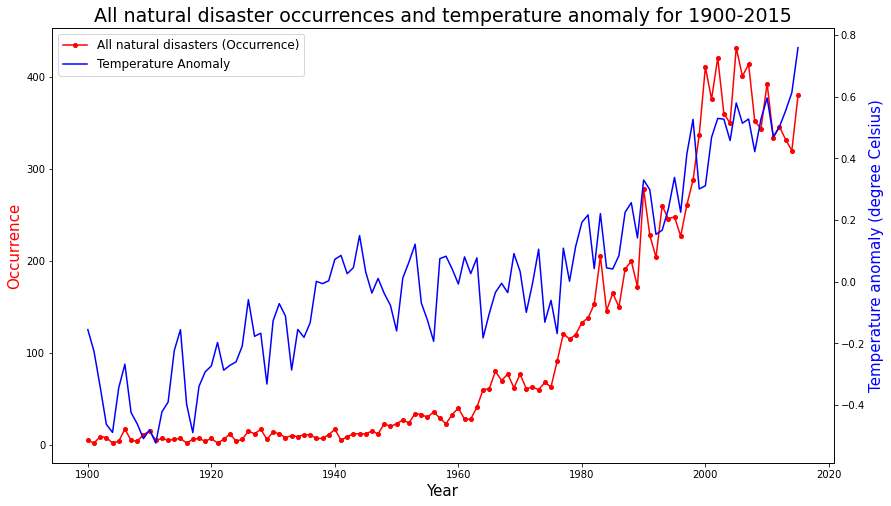

In [34]:
natd=pd.read_csv("number-of-natural-disaster-events.csv")
ndc=natd.copy()

ndc.drop(['Code'], axis = 1, inplace = True)

ndc = ndc.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')

ndc.drop(['Impact'], axis = 1, inplace = True)

ndc.fillna(value = 0, inplace = True)
ndc = ndc.add_suffix(' (Occurrence)')

nd_gt=gt.copy()


nd_gt = nd_gt[['dt', 'LandAndOceanAverageTemperature']]


nd_gt['dt'] = pd.to_datetime(nd_gt['dt'])
nd_gt.set_index('dt', inplace = True)
nd_gt.sort_index(axis = 0, inplace = True)


nd_gt = nd_gt.resample('A').mean()
nd_gt.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
nd_gt.index.rename('Year', inplace = True)
nd_gt.index = nd_gt.index.year

nd_gt.dropna(inplace = True)


global_ref_temp = nd_gt.loc['1951':'1980'].mean()['AnnualAverageTemp'] 


nd_gt['Temperature Anomaly'] = nd_gt['AnnualAverageTemp'] - global_ref_temp
nd_gt.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(ndc.loc[:2015, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(nd_gt.loc[1900:, 'Temperature Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()
hide_toggle()

In [35]:
orig_econ_data = pd.read_csv('economic-damage-from-natural-disasters.csv')
econ_dmg_df = orig_econ_data.copy()

econ_dmg_df.drop(['Code'], axis = 1, inplace = True)

econ_dmg_df = econ_dmg_df.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')

econ_dmg_df.drop(['Impact'], axis = 1, inplace = True)

econ_dmg_df.fillna(value = 0, inplace = True)

del econ_dmg_df['All natural disasters']

econ_dmg_df.drop(econ_dmg_df[econ_dmg_df.index < 1960].index, inplace = True)

fig = px.bar(econ_dmg_df, x=econ_dmg_df.index, y=econ_dmg_df.columns)

fig.update_layout(height=600,width=1000,template='plotly_dark',
                  title_text='Economic damage by the type of Natural Disaster from 1960-2018',
                 yaxis_title='Economic Damage in Billions',
                 xaxis_title='Year')
fig.show()
hide_toggle()

<b>The United Nations Environment Programme estimates that adapting to climate change and coping with damages will cost developing countries 140-300 billion dollars per year by 2030</b>.<br>
Another research suggests that the expected global GDP impact by 2050 under different scenarios compared to a world without climate change would be:<br>
-18% if no mitigating actions are taken (3.2°C increase);<br>
-14% if some mitigating actions are taken (2.6°C increase);<br>
-11% if further mitigating actions are taken (2°C increase);<br>
-4% if Paris Agreement targets are met (below 2°C increase)<br>

Many changes in the climate system become larger in direct relation to increasing global
warming. They include increases in the frequency and intensity of hot extremes, marine
heatwaves, and heavy precipitation, agricultural and ecological droughts in some regions,
and proportion of intense tropical cyclones, as well as reductions in Arctic sea ice, snow
cover and permafrost.<br>

Continued global warming is projected to further intensify the global water cycle, including
its variability, global monsoon precipitation and the severity of wet and dry events.Low-likelihood outcomes, such as ice sheet collapse, abrupt ocean circulation changes,
some compound extreme events and warming substantially larger than the assessed very
likely range of future warming cannot be ruled out and are part of risk assessment.<br>

From a physical science perspective, limiting human-induced global warming to a specific
level requires limiting cumulative CO2 emissions, reaching at least net zero CO2
emissions, along with strong reductions in other greenhouse gas emissions. Strong, rapid
and sustained reductions in CH4 emissions would also limit the warming effect resulting
from declining aerosol pollution and would improve air quality. At 2°C of global warming, heat extremes would more often reach critical tolerance thresholds for agriculture and health, the report shows.

Climate change is intensifying the water cycle. This brings more intense rainfall and associated flooding, as well as more intense drought in many regions.
Further warming will amplify permafrost thawing, and the loss of seasonal snow cover, melting of glaciers and ice sheets, and loss of summer Arctic sea ice.


<b> Forcasting </b>

In [36]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
raw_t = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1)
raw_e = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10515380.csv', skiprows=3)
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')
type(date_rng[0])
t = pd.DataFrame(date_rng, columns=['date'])
t['Avg_Anomaly_deg_C'] = None
t.set_index('date', inplace=True)
raw_t = raw_t.iloc[:,:13]
def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        t.loc[date_index] = monthly_anomolies[month]
_ = raw_t.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))
t.fillna(method='ffill', inplace=True)
t.resample('A').mean().head()
t.resample('A').mean().head()
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')
hide_toggle()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


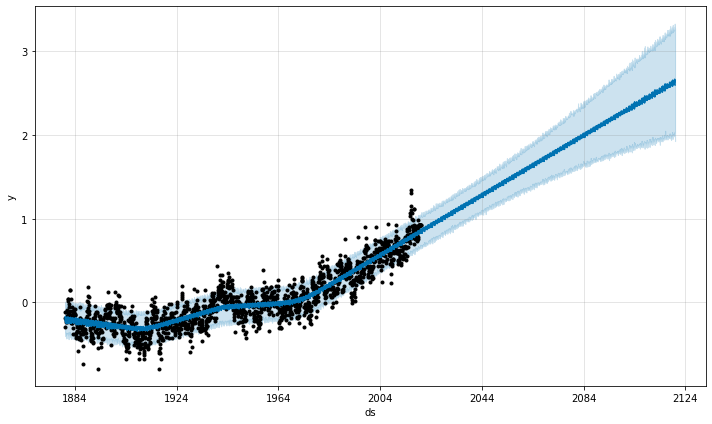

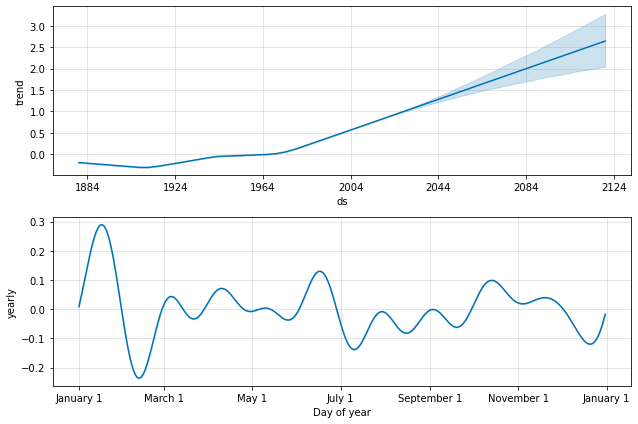

In [37]:
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values
m = Prophet()
m.fit(t_prophet)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)
m.plot(forecast);
m.plot_components(forecast);
hide_toggle()